<h1>Introduction</h1>

<h2>A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Stroke is one of the leading causes of death globally. </h2>

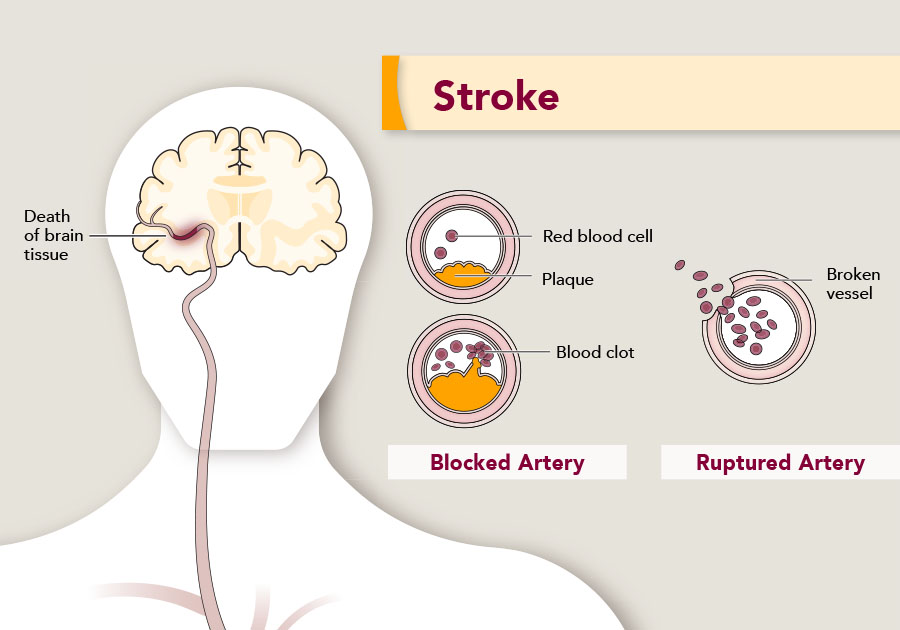 <br>

<h3>We will take a look into the dataset to understand what are the possible causes of stroke and if there are any parameters that correlate to stroke. We will also predict whether a patient is likely to get a stroke based on the input parameters. </h3>

<h3>Lets Begin!</h3>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import iplot,init_notebook_mode
import plotly.graph_objects as go


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.shape

In [ ]:
#df.isnull().sum()
df.head(14)

In [ ]:
df.describe().transpose()

In [ ]:
df.info()

# Cleaning Our Data

In [ ]:
 # Finding columns with NULL VALUES
df.isnull().sum()

<h3>Observation</h3>

Only bmi has null values.
Next step we have to handle the NULL values

<h2> 1. BMI </h2>

What is BMI?
Body mass index (BMI) is a value derived from the mass (weight) and height of a person
BMI is an screening method for weight category—underweight, healthy weight, overweight, and obesity

For most adults, an ideal BMI is in the 18.5 to 24.9 range:
- Below 18.5	 ->  Underweight
- 18.5 – 24.9	 ->  Normal or Healthy Weight
- 25.0 – 29.9	 ->  Overweight
- 30.0 and Above -> Obese



In [ ]:
# lets look at BMI in relation to Male
df_male = df[df['gender']=="Male"]
px.scatter(data_frame=df_male,x=df_male['bmi'], y=df_male['age'],color='stroke',title='BMI_Male_Age')

In [ ]:
# lets look at BMI in relation to Female
df_female = df[df['gender']=="Female"]
px.scatter(data_frame=df_female,x=df_female['bmi'], y=df_female['age'],color='stroke',title='BMI_Female_Age')

In [ ]:
print ("Mean for Male Group:",df_male['bmi'].mean())
print ("Mean for Female Group:",df_female['bmi'].mean())

In [ ]:
#lets replace the Null values with the mean of the BMI based on each gender
df["bmi"] = df["bmi"].fillna(df.groupby("gender")["bmi"].transform("mean"))

In [ ]:
# index 1 had a BMI of Null previously and it has been successfully been replaced with the mean
df["bmi"][1]

In [ ]:
# check if there is any null values available
df.isnull().sum()

<h3> 2. Gender </h3>

In [ ]:
df[['gender','id','stroke']].groupby('gender').count().reset_index()

In [ ]:
px.histogram(data_frame=df,x=df['gender'],title='Gender')

**Observation:**

<br> The dataset consist of more females than Male, the dataset is skewed.
<br> There is an Other Category.Since there is only 1 row with a Gender column as 'other', will remove that row.

In [ ]:
df[df['gender'] == 'Other']

In [ ]:
#remove the gender which is stated as 'other'
df = df.drop(3116)

In [ ]:
# Checking if the row with gender="other" has been removed
df[df['gender'] == 'Other']

In [ ]:
# data available after removing 'other' gender
df.info()

<h3> 3. Id </h3>

ID is unique number used for each person in the dataset, however it is irrelevant as it does not bring value to our visualization. Hence, going to drop ID column

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
# checking if ID has been dropped
df.info()

# Visualizing the data

<h3>Looking into correlation</h3>

In [ ]:
# shifting the stroke column to to the first 
# https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
first_column = df.pop('stroke')
df.insert(0, 'stroke', first_column)
df.head(5)

In [ ]:
# correlation only goes with all the continous numeric variables
# non numeric columns are ignored
df.corr()

In [ ]:
fig_heat = px.imshow(df.corr())
fig_heat.update_xaxes(side="top")

**Observation**

With just the categorical numerical columns, Age has a higher correlation with Stroke.
However, the correlation is small.

 <h3> Gender </h3>

In [ ]:
px.histogram(df,color='stroke', x='gender')

**Observation**

The dataset consist of more female participants than male participants.

<h2> BMI </h2>

In [ ]:
px.scatter(data_frame=df,x=df['bmi'],title='BMI')

In [ ]:
#the spread of gender with BMI
px.histogram(df,x='bmi', color='gender', title = 'BMI and gender')

In [ ]:
px.histogram(data_frame=df,x='bmi',color='stroke',title='BMI and Stroke',nbins=20)

**Observation**

<b> Plot: BMI and gender </b></br>

Most Males and Females fall in the BMI range of 28-29

<b> Plot: BMI and Stroke </b></br>

Among these BMI ranges there are a higher count of people with stroke 
-  BMI of 25 - 29.9 -> 75
-  BMI of 30 to 34.9 -> 56

In conclusion, The particpants in the dataset with Stroke have a BMI in the range of 25-35

# Age

In [ ]:
px.histogram(df,x=df.age,title='Age',nbins=20)

In [ ]:
px.histogram(y='stroke',x='age',data_frame=df,nbins=20, title='Age relation with Stroke')

In [ ]:
#comparing age,stroke and smoking status
px.histogram(y='stroke',x='age',data_frame=df, color='smoking_status', nbins=20,
             title='Smoking status with relation with Age and Stroke')

**Observation**

<b>Plot -> Age relation with Stroke</b>
- There is a gradually upward trend of number of people with stroke from the ages of 40 to 80
    
Key focus on the age group with high number of people with stroke <br>
55 - 59 -> 31 <br>
70 - 74 -> 32 <br>
75 - 79 -> 62 <br>
80 - 84 -> 40 <br>

<b>Plot -> Smoking status with relation with Age and Stroke </b><br>

There is an upward trend of stroke amongst people who smoked formerly and also for those who never smoked. However, as seen, people who never smoked tend to have stroke at a later age of 75 to 79 as compared to those who formerly smoked that tend to get stroke at an early age between the age ranges of 55 - 59 and 65 - 69.



# Smoking

In [ ]:
px.histogram(x='smoking_status',data_frame=df,title="Smoking Status")

In [ ]:
sns.set_style('dark')
sns.catplot(x="gender", hue="smoking_status", col="stroke",
                data=df, kind="count",
                height=7, aspect=.9);


In [ ]:
# No. of people who are unknown and have stroke
Unknown_stroke_1 = sum(df[(df['smoking_status']=='Unknown') & (df['stroke'] == 1)]['stroke'])
Unknown_stroke_0 = (df[(df['smoking_status']=='Unknown') & (df['stroke'] == 0)]['stroke']).count()
print("Unknown Smoking status and have stroke:",Unknown_stroke_1)
print("Unknown Smoking status and does not have stroke:",Unknown_stroke_0)

In [ ]:
px.histogram(df,x='smoking_status',color='stroke',title=" Stroke relation with Smoking Status")

**Observation**

<b> Plot: Smoking Status </b> 

For each category for smoking_status: <br> 
  1. never smoked = 1892 <br>
  2. formerly smoked = 884 <br>
  3. unknown = 1544 <br>
* Unknown Smoking status and have stroke: 47
* Unknown Smoking status and does not have stroke: 1497
  4. smokes = 789 <br>
 
<b> Plot: Stroke relation with Smoking Status </b> 

<b>Formerly smoked:</b>
3.699% of formerly smoked has stroke -> 1.37% of overall data<br>
<b>Never smoked: </b>
4.756% of those who never smoked has stroke -> 1.76% of overall data <br>
<b>Smokes:</b>
5.323 % of those who smoke has stroke -> 0.82% of overall data <br>
<b>Unknown:</b>
3.044% of unknown status has stroke -> 0.91% of overall data<br>

The dataset consists of mostly people who have never smoked. Amongst those who have never smoked, 1.76% of the participants have had a stroke. Hence, the number of participants who have never smoked make up the highest number of stroke patients. As this is contrary to what we know about the effects of smoking, more data is needed to examine the relation between stroke and smoking.

# Ever married

In [ ]:
px.histogram(df,x=df['ever_married'],title="Ever Married")

In [ ]:
px.histogram(df,x=df['ever_married'],color='stroke',title="Stroke among married and unmarried")

In [ ]:
px.histogram(df,y='stroke',x='age',color='ever_married',nbins=20,title="Stroke along with marriage status and age")

**Observation**

<b> Plot: Ever Married </b>

The dataset consists of mostly participants who are married

<b> Plot: Stroke among married and unmarried </b>

As the overall data consist of 65% of people who are married as compared to 35% those who are not married <br>
-> It seems that people who are married are high likely to get stroke LOL

<b> Plot: Stroke along with marriage status and age  </b>

There is an upward trend for people who are married and have a stroke


# Work type

In [ ]:
df['work_type'].unique()

In [ ]:
px.pie(df, names='work_type',title='Work Type',color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.histogram(df,y='stroke',x='work_type',title="Stroke among Work Type")

**Observation**<br>

There are 5 unique categories in work type.

% against the overall dataset of 5109 data points<br>
<b>Private</b> -> 2.91 % got stroke <br>
<b>Self employed</b> -> 1.27% got stroke <br>
<b>Govt_job</b> -> 0.64% got stroke <br>
<b>Children</b> -> 0.039% got stroke<br>
<b>Never worked</b> -> 0% got stroke

Among the work types, the highest number of people with stroke work in the private sector. 

# Hypertension

***Pie charts*** 

<b>Left:</b> Percentage of People with and without Stroke among the Hypertension Group<br>
<b>Right:</b> Percentage of People with and without Hypertension among the Stroke Group

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#Percentage of People with and without Stroke among the Hypertension Group
fig.add_trace(go.Pie(labels=df.stroke,values=df.hypertension,name="Stroke Among HTN"), 
     row=1, col=1)

#Percentage of People with and without Hypertension among the Stroke Group
fig.add_trace(go.Pie(labels=df.hypertension,values=df.stroke,name="HTN Among Stroke"),
     row=1, col=2)

fig.update_traces(hoverinfo="percent+name")

fig.update_layout(title_text="Relation between Stroke and Hypertension")

iplot(fig)

<b>Observation:</b><br>

<b>Left: People with and without Stroke among the Hypertension Group</b>
-  The percentage of those who **do not have stroke and have hypertension** is **more** than those who **have both stroke and hypertension**.

<b>Right: People with and without Hypertension among the Stroke Group </b>
- The percentage of people who **do not have hypertension and have stroke** is **more** than those who **have both hypertension and stroke**.


In [ ]:
# sub dataframes
df_NOhyper_STROKE = df[(df["hypertension"]==0) & (df['stroke']==1)]
df_hyper_STROKE = df[(df["hypertension"]==1) & (df['stroke']==1)]

In [ ]:
df_1 = df_NOhyper_STROKE
df_2 = df_hyper_STROKE

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_1.gender,
                    name = "No H w/ stroke"))
fig.add_trace(go.Histogram(x=df_2.gender,
                     name = "H w/ stroke"))

fig.update_layout(title_text="Hypertension correlation with stroke")

fig.show()

**Observation**

<b>Plot: Hypertension correlation with stroke </b>

The number of female participants who have HTN and stroke and do not have HTN and stroke is higher than male participants.

In conclusion, Hypertension does not correlate with stroke as the number of people who have had a stroke and do not have hypertension is significantly higher than those who have had a stroke and hypertension.

# Heart disease

In [ ]:
px.pie(df,names=df["heart_disease"],title="Number of Heart Disease Patients",color=df["heart_disease"],
      color_discrete_map={1:'royalblue',0:'darkblue'})

In [ ]:
px.pie(df,names=df["heart_disease"],values=df["stroke"],title="Stroke patients with and without Heart Disease",color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
# Gender difference with heart disease and stroke 
df_3 = df[(df["heart_disease"]==0) & (df['stroke']==1)]
df_4 = df[(df["heart_disease"]==1) & (df['stroke']==1)]

trace0=go.Histogram(x=df_3.gender,
                    name = "Stroke w/o Heart Disease")
trace1=go.Histogram(x=df_4.gender,
                     name = "Stroke w/ Heart Disease")
data=[trace0,trace1]
layout={"title":"Gender comparison among Stroke patients with and without Heart Disease",
       "xaxis":{"title":"Gender"}}
iplot({"data":data,"layout":layout})

**Observation**

<b>Plot -> Number of Heart Disease patients </b>

The number of heart disease participants makes up to 5.4% of the overall dataset.

<b>Plot -> Stroke patients with and without Heart Disease </b> 

The number of people with stroke and heart disease is less than the number of people with stroke and without heart disease.    
  
<b>Plot -> Gender comparison among Stroke patients with and without Heart Disease</b>

Male participants have a higher number of participants with stroke and heart disease as compared to Female participants.
However, Female participants have a higher number of participants with stroke and without heart disease as compared to Male participants.

# Residental type

In [ ]:
data=[go.Bar(x=df["Residence_type"],y=df["Residence_type"].value_counts(),text=df["Residence_type"].value_counts(),
            textposition='auto',marker=dict(color=["rgba(255,110,110,1)","rgba(0,0,110,1)"],))]
layout={"title":"Residence Type"}
iplot({"data":data,"layout":layout})

In [ ]:
(df[df["stroke"]==1]["Residence_type"]).value_counts()

In [ ]:
# Gender difference with heart disease 
df_5 = df[(df["Residence_type"]=="Urban") & (df['stroke']==1)]
df_6 = df[(df["Residence_type"]=="Rural") & (df['stroke']==1)]

trace0=go.Histogram(x=df_5.gender,
                    name = "Urban")
trace1=go.Histogram(x=df_6.gender,
                     name = "Rural")
data=[trace0,trace1]
layout={"title":"Residence Type with Stroke",
       "xaxis":{"title":"Gender"}}
iplot({"data":data,"layout":layout})

**Observation**

<b>Plot -> Residence Type </b>

There are two residence types, Urban and Rural.
The number of Rural and Urban participants are equal.


<b>Plot -> Residence Type with Stroke</b>

The number of female participants with stroke who live in either residence type are higher than male participants.


# Avg Glucose level

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal.<br> A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes.<br> A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes

In [ ]:
from plotly.subplots import make_subplots

trace2=go.Histogram(x=df["avg_glucose_level"],nbinsx=12,name="Avg Glucose Level Spread")
trace0=go.Histogram(x=(df[df["stroke"]==1]["avg_glucose_level"]),nbinsx=12,name=" W/ Stroke")
trace1=go.Histogram(x=(df[df["stroke"]==0]["avg_glucose_level"]),nbinsx=12,name=" W/O Stroke")

fig= make_subplots(rows=2, cols=2,
                   specs = [[{"colspan":2},None],[{},{}]],
                   subplot_titles=("Avg Glucose","w/ Stroke","w/o Stroke"))

fig.append_trace(trace2,1,1)
fig.append_trace(trace0,2,1)
fig.append_trace(trace1,2,2)

fig.layout.update(title="Avg Glucose Level with and without stroke")

iplot(fig)

**Observation**

<b>Plot -> Avg Glucose Level with and without stroke </b>

* Avg Glucose level with high number of stroke patients in the healthy range<br>
  * 60-79.9 has 55 people with stroke <br>
  * 80-99.9 has 49 people with stroke <br>
* In the w/ stroke histogram there are participants with stroke who have high glucose level between 160-250.

In conclusion, a participant has a stroke even if they have a healthy avg glucose level. However, participants with high glucose levels certainly have stroke.

<h2> Final Conclusion</h2>

**Looking into the correlation** ->
Age has a higher correlation with Stroke.
However, the correlation is small.

**Gender** ->
The dataset consist of more female than male.
Thus, why the number of females with and without stroke is higher than male.

**BMI** ->
The particpants in the dataset with Stroke have a BMI in the range of 25-35
 
**Age** ->
As seen above there are participants from the age range of 0.08 to 82.
There is a upward trend of stroke amongst those who smoked formely and also amongst those who have never smoked. However, as seen, people who never smoked tend to have stroke at a later age and those who formerly smoked has a stroke at the age of 55

**Smoking** ->
Particpants who formerly smoked and currently smoke have a high chance of getting stroke.

**Ever_married** ->
As the overall data consist of 65% of people who are married as compared to 35% those who are not married. It seems that people who are married are high likely to get stroke LOL

**Worktype** ->
Among the work types, the number of people with stroke among the particpants working in the private sector percentage is the highest.

**Hypertension** ->
The number of Female participants who have HTN with stroke and dont have HTN with stroke is higher than male participants.

**Heart disease** ->
The number of people with stroke and heart disease is less than the number of people with stroke and without heart disease. Among the genders, Male partcipants have a higher number of particpants with stroke and heart disease.

**Residence Type** ->
The number of female participants with stroke who live in either residence types are higher than male participants.

**Avg Glucose level** ->
The number of participants with stroke have a high glucose level between 160-250.

<h2>In Summary</h2>
- The dataset consist of more female participants than male participants. Hence an imbalanced dataset. It would be better if we have an equal sample of participants for each of the gender category <br>
- Age,BMI,Avg Glucose level seem to have a correlation with stroke. However. more data is needed to confirm this <br>
- Surprisingly a high number of participants who have stroke are married LOL <br>
- Hypertension and Heart disease have no correlation with stroke as the number of participants with neither of the diseases have stroke as compared to participants with either of the diseases  <br>
- Participants who work at the private sector have the highest number of stroke participants. However, if we have an equal sample for each work type category. This would help us conclude if working at the private sector can play a part in having a stroke <br>
- Residence type is not a good feature to be used for finding if stroke is correlated <br>

<h1> Data Preprocessing </h1>

<h3>Encoding the all the categorical columns</h3>

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] =df["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [ ]:
# using dummies to convert categorical values with different labels to numerical indicators
df = pd.get_dummies(data=df, columns=["work_type","smoking_status"])

In [ ]:
df.head()

<h3> Train Test Split </h3>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df["stroke"]
df.drop(columns=["stroke"],inplace=True)
X=df

In [ ]:
df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<h3>Scaling</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1>Training the model</h1>

<h2>Decision Tree Model </h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Prediction and Evaluation of Decision Tree

predictions = dtree.predict(X_test)
dtree_score = dtree.score(X_train, y_train) 
dtree_test = dtree.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix # draw a confusion matrix

print("Training score:",dtree_score)
print("Testing score:",dtree_test)

# Classification report
print(classification_report(y_test,predictions))

print("\n")
# confusion matix
plot_confusion_matrix(dtree,
                     X_test,
                     y_test,
                     display_labels=["Has Stroke","Does not have Stroke"])

print("\n")
# Confursion matrix
#print(confusion_matrix(y_test,predictions))

<h2>Random Forest Model </h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

In [ ]:
# Prediction and Evaluation

rfc_score = rfc.score(X_train, y_train) 
rfc_test = rfc.score(X_test, y_test)
predictions = rfc.predict(X_test)

In [ ]:
print("Training score:",rfc_score)
print("Testing score:",rfc_test)
print("\n")
# Classification report
print(classification_report(y_test,predictions))
print("\n")
# confusion matix
plot_confusion_matrix(rfc,
                     X_test,
                     y_test,
                     display_labels=["Has Stroke","Does not have Stroke"])
print("\n")
# Confursion matrix
#print(confusion_matrix(y_test,predictions))

<h2>Gradient Boost Classifier</h2>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier(learning_rate= 0.1,n_estimators= 100)
GBC.fit(X_train,y_train)

In [ ]:
# Prediction and Evaluation

GBC_score = GBC.score(X_train, y_train) 
GBC_test = GBC.score(X_test, y_test)
predictions = GBC.predict(X_test)

In [ ]:
print("Training score:",GBC_score)
print("Testing score:",GBC_test)
print("\n")
# Classification report
print(classification_report(y_test,predictions))
print("\n")
# confusion matix
plot_confusion_matrix(GBC,
                     X_test,
                     y_test,
                     display_labels=["Has Stroke","Does not have Stroke"])
# Confursion matrix
#print(confusion_matrix(y_test,predictions))
#print("\n")


<h2>XGBoost Classifier</h2>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB=XGBClassifier(learning_rate=0.1,n_estimators=100)
XGB.fit(X_train,y_train)

In [ ]:
# Prediction and Evaluation

XGB_score = XGB.score(X_train, y_train) 
XGB_test = XGB.score(X_test, y_test)
predictions = XGB.predict(X_test)

In [ ]:
print("Training score:",XGB_score)
print("Testing score:",XGB_test)
print("\n")
# Classification report
print(classification_report(y_test,predictions))
print("\n")
plot_confusion_matrix(XGB,
                     X_test,
                     y_test,
                     display_labels=["Has Stroke","Does not have Stroke"])
# Confursion matrix
#print(confusion_matrix(y_test,predictions))
#print("\n")

In [ ]:
print("DecisionTree Accuracy:",round(dtree_test*100,2))
print("RandomForest Classifier Accuracy:",round(rfc_test*100,2))
print("GradientBoosting Classifier Accuracy:",round(GBC_test*100,2))
print("XGBoost Classifier Accuracy:",round(XGB_test*100,2))

In [ ]:
x=["DecisionTree","RandomForest","GradientBoosting","XGBoost"]
y=[round(dtree_test*100,2),round(rfc_test*100,2),round(GBC_test*100,2),round(XGB_test*100,2)]
trace=go.Bar(x=x,y=y,text=y,
            textposition='auto')
layout={"title": "Model Accuracy",
       "xaxis":{"title":"Model Name"},
       "yaxis":{"title":"Accuracy"}}
fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

**In Conclusion**

RandomForest seem to have a higher accuracy as compared to other ML models.
